<a href="https://colab.research.google.com/github/itsabbhii/NeoInsight/blob/main/CNN/Asessment_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/itsabbhii/Training-AIML.git
%cd Training-AIML/CNN/archive

Cloning into 'Training-AIML'...
remote: Enumerating objects: 1120, done.
remote: Counting objects: 100% (918/918), done.
remote: Compressing objects: 100% (901/901), done.
remote: Total 1120 (delta 46), reused 858 (delta 14), pack-reused 202 (from 1)
Receiving objects: 100% (1120/1120), 54.22 MiB | 23.13 MiB/s, done.
Resolving deltas: 100% (120/120), done.
/content/Training-AIML/CNN/archive


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
train_dir = "train"
test_dir = "test"

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)


Found 811 images belonging to 3 classes.
Found 74 images belonging to 3 classes.


In [7]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(train_data.num_classes, activation='softmax'))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,638,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,732,163 (6.61 MB)

 Trainable params: 1,732,163 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    train_data,
    epochs=20,
    validation_data=test_data,
    steps_per_epoch=len(train_data),
    validation_steps=len(test_data),
    callbacks=[early_stopping]
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 258ms/step - accuracy: 0.3228 - loss: 1.1686 - val_accuracy: 0.6757 - val_loss: 0.8732
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.5576 - loss: 0.9014 - val_accuracy: 0.7568 - val_loss: 0.5879
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.6118 - loss: 0.7843 - val_accuracy: 0.8378 - val_loss: 0.4044
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.6802 - loss: 0.6396 - val_accuracy: 0.7703 - val_loss: 0.5082
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.7921 - loss: 0.5290 - val_accuracy: 0.8108 - val_loss: 0.5231
Epoch 10/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.8674 - loss: 0.3939 - val_accuracy: 0.5946 - val_loss: 0.9891
Epoc

In [9]:
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.2f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9641 - loss: 0.1053
Test Accuracy: 0.96


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


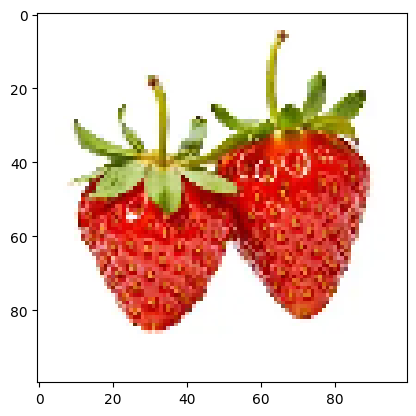

Predicted Class: strawberry


In [11]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

image_path = "/content/download.webp"

image = load_img(image_path, target_size=(100, 100))
image_array = img_to_array(image) / 255.0
image_array = np.expand_dims(image_array, axis=0)

predictions = model.predict(image_array)
predicted_class = np.argmax(predictions)

plt.imshow(image)
plt.show()
class_labels = list(train_data.class_indices.keys())
print(f"Predicted Class: {class_labels[predicted_class]}")
